In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

df = pd.read_excel('QSR_DS.xlsx') 
print(df.shape)
df.head()

(1499, 28)


,2024_RANK,2023_RANK,Institution_Name,Location,Location.1,SIZE,FOCUS,RES.,STATUS,AR_SCORE,...,IF_RANK,IS_SCORE,IS_RANK,IRN_SCORE,IRN_RANK,EO_SCORE,EO_RANK,S_Score,S_Rank,OVERALL_SCORE
0,rank display,rank display2,institution,location code,location,size,focus,research,status,ar score,...,ifr rank,isr score,isr rank,irn score,irn rank,ger score,ger rank,SUS SCORE,SUS RANK,Overall Score
1,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,CO,VH,B,100,...,56,88.2,128,94.3,58,100,4,95.2,51,100
2,2,2,University of Cambridge,UK,United Kingdom,L,FC,VH,A,100,...,64,95.8,85,99.9,7,100,6,97.3,33=,99.2
3,3,4,University of Oxford,UK,United Kingdom,L,FC,VH,A,100,...,110,98.2,60,100,1,100,3,97.8,26=,98.9
4,4,5,Harvard University,US,United States,L,FC,VH,B,100,...,210,66.8,223,100,5,100,1,96.7,39,98.3


In [42]:
# Check for missing values
print(df.isnull().sum())
# Droping missing values
df.dropna(inplace= True)
df.info()

2024_RANK             0
2023_RANK            83
Institution_Name      0
Location              0
Location.1            0
SIZE                 23
FOCUS                 1
RES.                 87
STATUS               45
AR_SCORE              0
AR_RANK               0
ER_SCORE              1
ER_RANK               1
FS_SCORE             24
FS_RANK              24
CF_SCORE             24
CF_RANK              24
IF_SCORE            126
IF_RANK             126
IS_SCORE             80
IS_RANK              80
IRN_SCORE             4
IRN_RANK              4
EO_SCORE             24
EO_RANK              24
S_Score             100
S_Rank              100
OVERALL_SCORE         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 1228 entries, 0 to 1495
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   2024_RANK         1228 non-null   object
 1   2023_RANK         1228 non-null   object
 2   Institution_Name  1228 n

In [43]:
# Checking for duplicate
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [44]:
# Remove trailing '=' and '+' characters from the '2023_RANK' column
df['2023_RANK'] = df['2023_RANK'].str.rstrip('=+')

# Remove leading '=' and '+' characters from the '2024_RANK' column
df['2024_RANK'] = df['2024_RANK'].str.lstrip('=+')

In [45]:
# Convert the '2023_RANK' column to numeric, coercing invalid values to NaN
df['2023_RANK'] = pd.to_numeric(df['2023_RANK'], errors='coerce')

# Convert the '2024_RANK' column to numeric, coercing invalid values to NaN
df['2024_RANK'] = pd.to_numeric(df['2024_RANK'], errors='coerce')

In [46]:
def parse_rank_to_midpoint(rank):
    # Check if the rank is a range (contains a '-')
    if '-' in str(rank):  
        # Split the range into lower and upper bounds and convert them to integers
        lower, upper = map(int, rank.split('-'))  
        # Return the midpoint of the range
        return (lower + upper) // 2  
    try:
        # If not a range, attempt to convert the rank directly to an integer
        return int(rank)  
    except ValueError:
        # If conversion fails (e.g., invalid or NaN), return NaN
        return np.nan  

# Apply the parse_rank_to_midpoint function to process the '2023_RANK' column
df['2023_RANK'] = df['2023_RANK'].apply(parse_rank_to_midpoint)

# Apply the parse_rank_to_midpoint function to process the '2024_RANK' column
df['2024_RANK'] = df['2024_RANK'].apply(parse_rank_to_midpoint)


In [47]:
# Preserve the original rank values by copying them into new columns
df['2023_RANK_ORIGINAL'] = df['2023_RANK']  # Save original '2023_RANK' values
df['2024_RANK_ORIGINAL'] = df['2024_RANK']  # Save original '2024_RANK' values

# Apply the parse_rank_to_midpoint function to transform '2023_RANK' into midpoints
df['2023_RANK'] = df['2023_RANK'].apply(parse_rank_to_midpoint)

# Apply the parse_rank_to_midpoint function to transform '2024_RANK' into midpoints
df['2024_RANK'] = df['2024_RANK'].apply(parse_rank_to_midpoint)


In [48]:
# Flag rows where ranks were ranges
df['Is_Rank_Range'] = df['2023_RANK_ORIGINAL'].astype(str).str.contains('-') | df['2024_RANK_ORIGINAL'].astype(str).str.contains('-')


In [49]:
df.dropna(inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 457 entries, 1 to 602
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   2024_RANK           457 non-null    float64
 1   2023_RANK           457 non-null    float64
 2   Institution_Name    457 non-null    object 
 3   Location            457 non-null    object 
 4   Location.1          457 non-null    object 
 5   SIZE                457 non-null    object 
 6   FOCUS               457 non-null    object 
 7   RES.                457 non-null    object 
 8   STATUS              457 non-null    object 
 9   AR_SCORE            457 non-null    object 
 10  AR_RANK             457 non-null    object 
 11  ER_SCORE            457 non-null    object 
 12  ER_RANK             457 non-null    object 
 13  FS_SCORE            457 non-null    object 
 14  FS_RANK             457 non-null    object 
 15  CF_SCORE            457 non-null    object 
 16  CF_RANK      

In [50]:
# Saving the data in a CSV file 
df.to_csv('cleaned_data.csv', index=False)

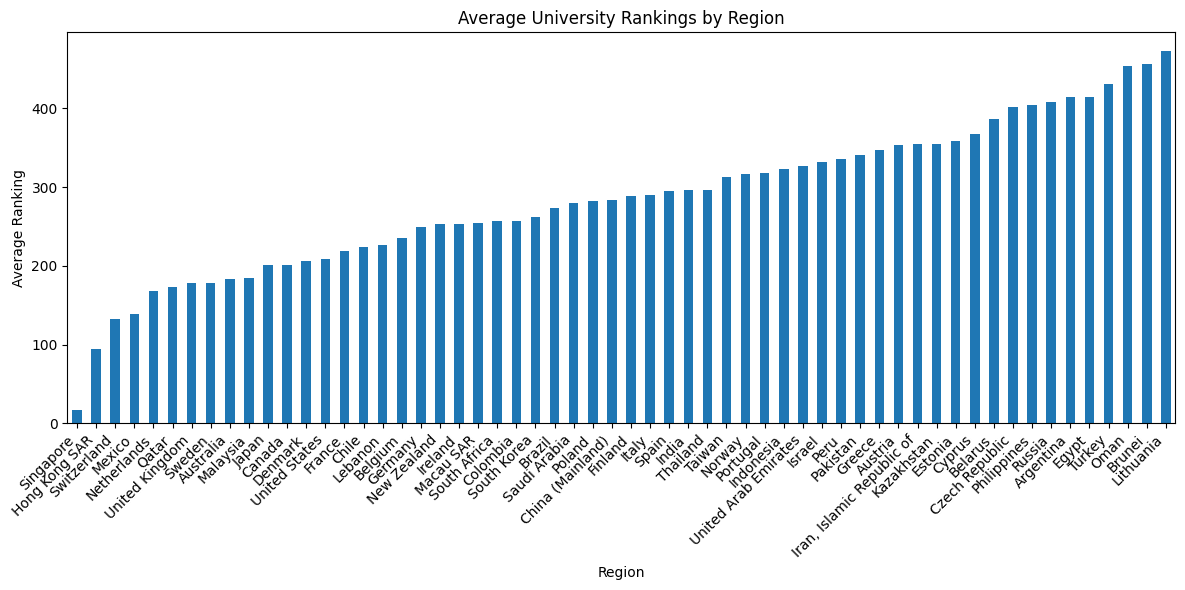

In [59]:
# Step 1: Function to load the data from a CSV file
def load_data():
    # Read the cleaned data from a CSV file and return the dataframe
    return pd.read_csv('cleaned_data.csv')

# Step 2: Function to plot a bar chart for average rankings by region
def plot_avg_rankings_by_region(df):
    # Step 2.1: Set up the figure size for the plot
    plt.figure(figsize=(12, 6))  # Adjust the figure size for clarity

    # Step 2.2: Group the data by 'Location.1' (region) and calculate average rankings for 2024
    region_rankings = df.groupby('Location.1')['2024_RANK'].mean().sort_values()  # Group by region and sort by average ranking

    # Step 2.3: Plot the bar chart of average rankings by region
    region_rankings.plot(kind='bar')  # Create a bar chart

    # Step 2.4: Customize the chart with title and labels
    plt.title('Average University Rankings by Region')  # Title of the chart
    plt.xlabel('Region')  # Label for the x-axis
    plt.ylabel('Average Ranking')  # Label for the y-axis

    # Step 2.5: Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels and adjust alignment

    # Step 2.6: Ensure the layout is tight and elements don't overlap
    plt.tight_layout()  # Adjust the layout for better spacing

    # Step 2.7: Display the plot
    plt.show()

# Step 3: Call the function to plot the average rankings by region
plot_avg_rankings_by_region(df)  # Generate and display the chart


C:\Users\HARSH\AppData\Local\Temp\ipykernel_5844\2266120446.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Regression Analysis Results:

R-squared: 1.0000

Feature Coefficients (Impact on Overall Score):
     Feature  Coefficient
0   AR_SCORE     8.168541
3   CF_SCORE     6.228685
1   ER_SCORE     4.484659
2   FS_SCORE     3.198902
4   IF_SCORE     1.841752
5   IS_SCORE     1.740071
6  IRN_SCORE     1.649468
8    S_Score     1.610527
7   EO_SCORE     1.331474

Correlation with Overall Score:
OVERALL_SCORE    1.000000
AR_SCORE         0.898044
ER_SCORE         0.758234
EO_SCORE         0.700007
S_Score          0.592511
IRN_SCORE        0.547334
CF_SCORE         0.529783
IS_SCORE         0.408499
IF_SCORE         0.359044
FS_SCORE         0.229113
Name: OVERALL_SCORE, dtype: float64


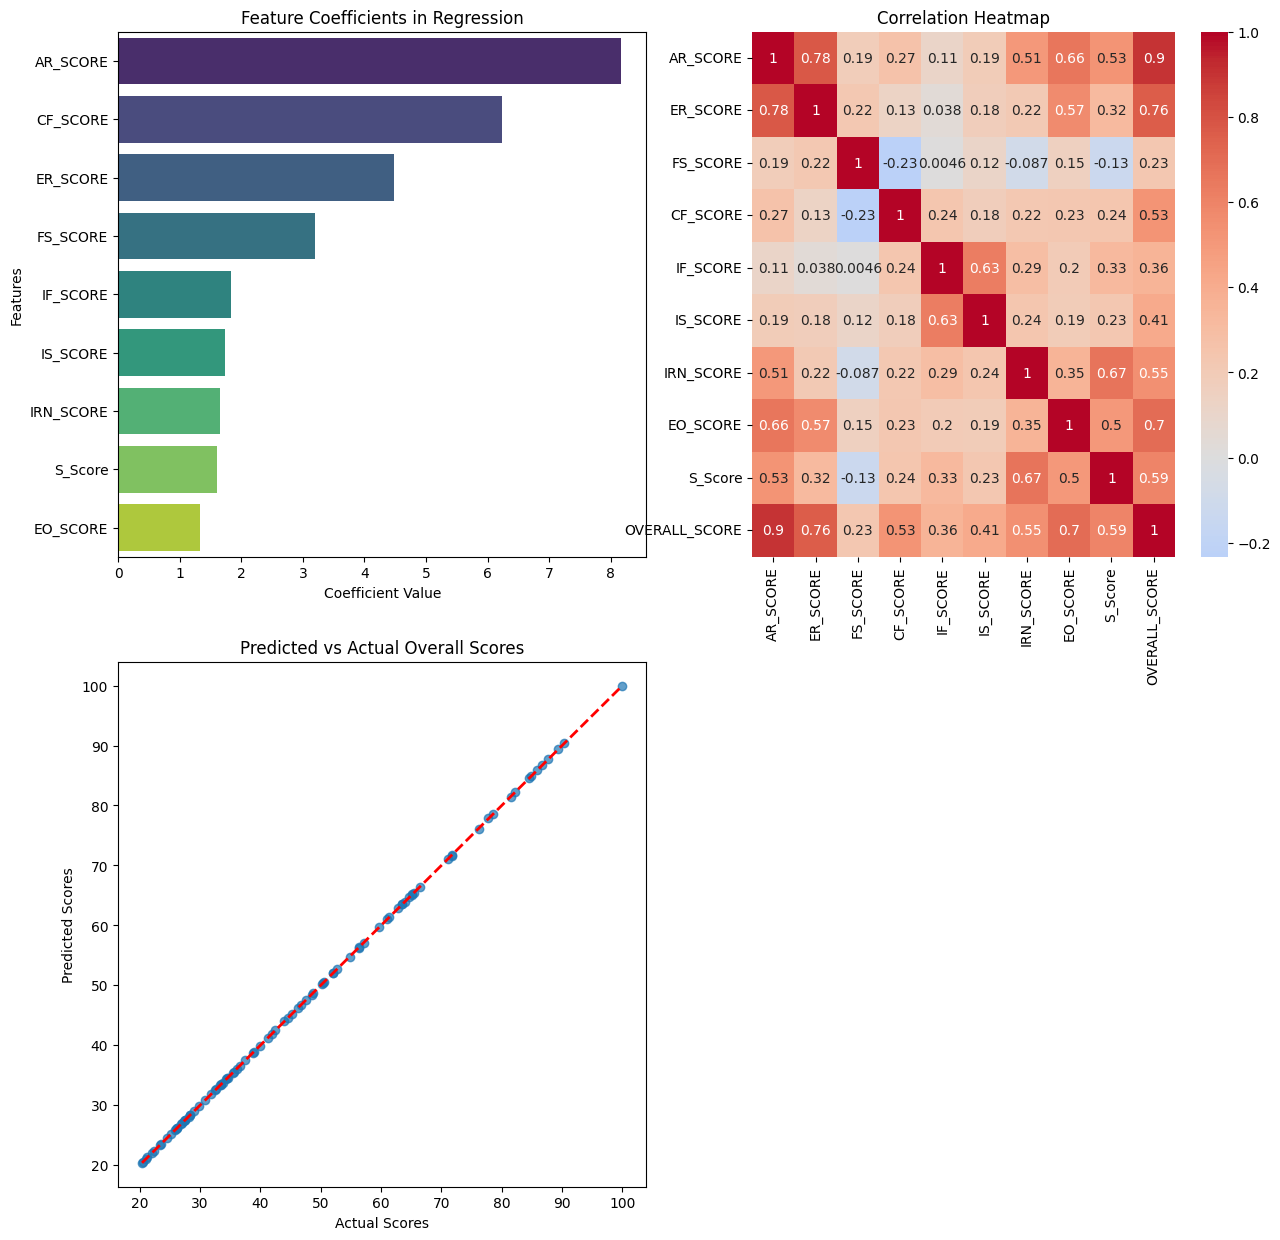

In [58]:
# Step 1: Select relevant numeric columns for regression analysis
numeric_columns = [
    'AR_SCORE', 'ER_SCORE', 'FS_SCORE', 'CF_SCORE', 
    'IF_SCORE', 'IS_SCORE', 'IRN_SCORE', 'EO_SCORE', 'S_Score'
]

# Step 2: Prepare the features (X) and target variable (y)
X = df[numeric_columns]  # Independent variables (features)
y = df['OVERALL_SCORE']  # Dependent variable (target)

# Step 3: Scale the features to standardize the data
scaler = StandardScaler()  # Initialize the scaler
X_scaled = scaler.fit_transform(X)  # Apply scaling to the feature data

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,  # Scaled features
    y,         # Target variable
    test_size=0.2,  # 20% of the data for testing
    random_state=42  # Random seed for reproducibility
)

# Step 5: Perform linear regression
regression = LinearRegression()  # Initialize the Linear Regression model
regression.fit(X_train, y_train)  # Train the model on the training set

# Step 6: Calculate R-squared to evaluate the model's performance
r_squared = regression.score(X_test, y_test)  # R-squared value on the test set

# Step 7: Create a dataframe of coefficients to interpret feature importance
coefficients_df = pd.DataFrame({
    'Feature': numeric_columns,           # Feature names
    'Coefficient': regression.coef_       # Corresponding regression coefficients
})
# Sort coefficients by their absolute values in descending order
coefficients_df = coefficients_df.sort_values('Coefficient', key=abs, ascending=False)

# Step 8: Visualization setup
plt.figure(figsize=(15, 15))  # Set the overall figure size

# 1. Bar Plot: Visualize feature coefficients
plt.subplot(2, 2, 1)  # Subplot 1 (top-left)
sns.barplot(
    x='Coefficient', 
    y='Feature', 
    data=coefficients_df, 
    palette='viridis'  # Color palette
)
plt.title('Feature Coefficients in Regression')  # Chart title
plt.xlabel('Coefficient Value')  # X-axis label
plt.ylabel('Features')  # Y-axis label

# 2. Heatmap: Display correlation matrix
plt.subplot(2, 2, 2)  # Subplot 2 (top-right)
correlation_matrix = df[numeric_columns + ['OVERALL_SCORE']].corr()  # Calculate correlations
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='coolwarm',  # Color scheme
    center=0          # Center at zero
)
plt.title('Correlation Heatmap')  # Chart title

# 3. Scatter Plot: Predicted vs Actual scores
plt.subplot(2, 2, 3)  # Subplot 3 (bottom-left)
y_pred = regression.predict(X_test)  # Predict the target variable using the test set
plt.scatter(y_test, y_pred, alpha=0.7)  # Scatter plot of actual vs predicted
plt.plot(
    [y_test.min(), y_test.max()], 
    [y_test.min(), y_test.max()], 
    'r--', lw=2  # Red dashed line for the ideal prediction
)
plt.title('Predicted vs Actual Overall Scores')  # Chart title
plt.xlabel('Actual Scores')  # X-axis label
plt.ylabel('Predicted Scores')  # Y-axis label

# Step 9: Print textual results
print("Regression Analysis Results:")
print(f"\nR-squared: {r_squared:.4f}")  # Print R-squared value
print("\nFeature Coefficients (Impact on Overall Score):")
print(coefficients_df)  # Print the sorted feature coefficients

print("\nCorrelation with Overall Score:")
print(correlation_matrix['OVERALL_SCORE'].sort_values(ascending=False))  # Print correlations with target variable


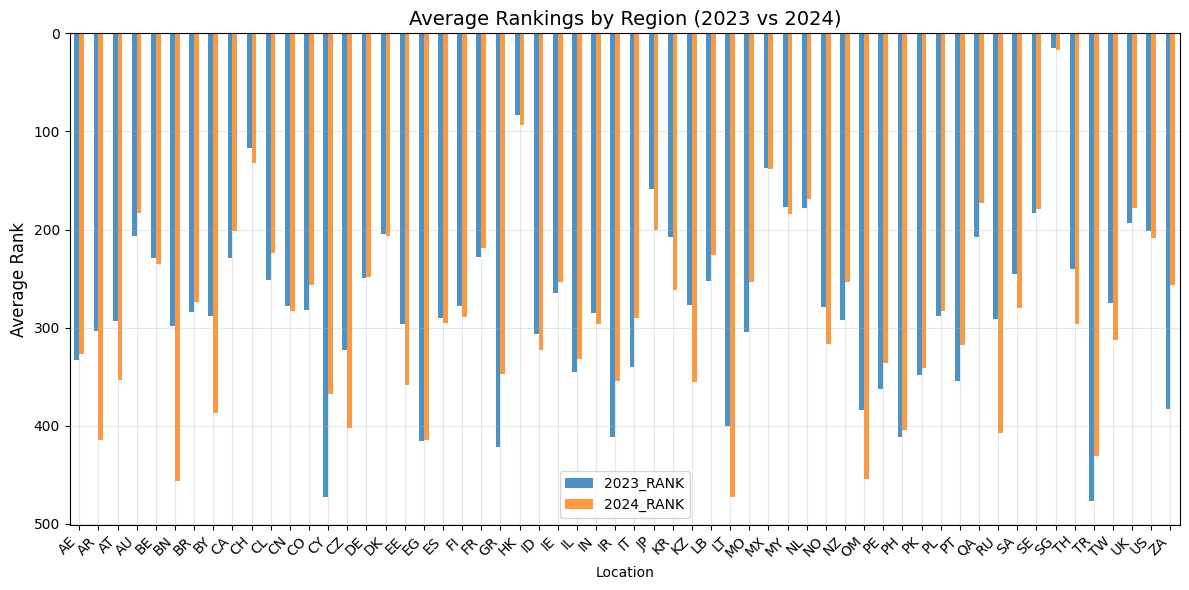

In [57]:
# Convert ranking columns to integers
df['2023_RANK'] = df['2023_RANK'].astype(int)  # Convert '2023_RANK' column to integer type
df['2024_RANK'] = df['2024_RANK'].astype(int)  # Convert '2024_RANK' column to integer type

# Function to create bar charts for average rankings and scores by region
def plot_bar_charts(df):
    # Step 1: Group the data by 'Location' and calculate average rankings and scores
    region_avg = df.groupby('Location')[['2023_RANK', '2024_RANK', 'OVERALL_SCORE']].mean()

    # Step 2: Create a bar chart for average rankings
    region_avg[['2023_RANK', '2024_RANK']].plot(
        kind='bar',        # Create a bar chart
        figsize=(12, 6),   # Set the figure size
        alpha=0.8          # Adjust bar transparency for better visibility
    )
    # Step 3: Customize the bar chart
    plt.title('Average Rankings by Region (2023 vs 2024)', fontsize=14)  # Add a title to the chart
    plt.ylabel('Average Rank', fontsize=12)  # Add a label to the y-axis
    plt.gca().invert_yaxis()  # Invert the y-axis to show higher ranks at the top
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.grid(alpha=0.3)  # Add a light grid to the chart for visual aid
    plt.tight_layout()  # Adjust the layout to prevent overlap

    # Step 4: Display the chart
    plt.show()

# Generate the bar charts
plot_bar_charts(df)  # Call the function to create and display the charts


C:\Users\HARSH\AppData\Local\Temp\ipykernel_5844\3673370760.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


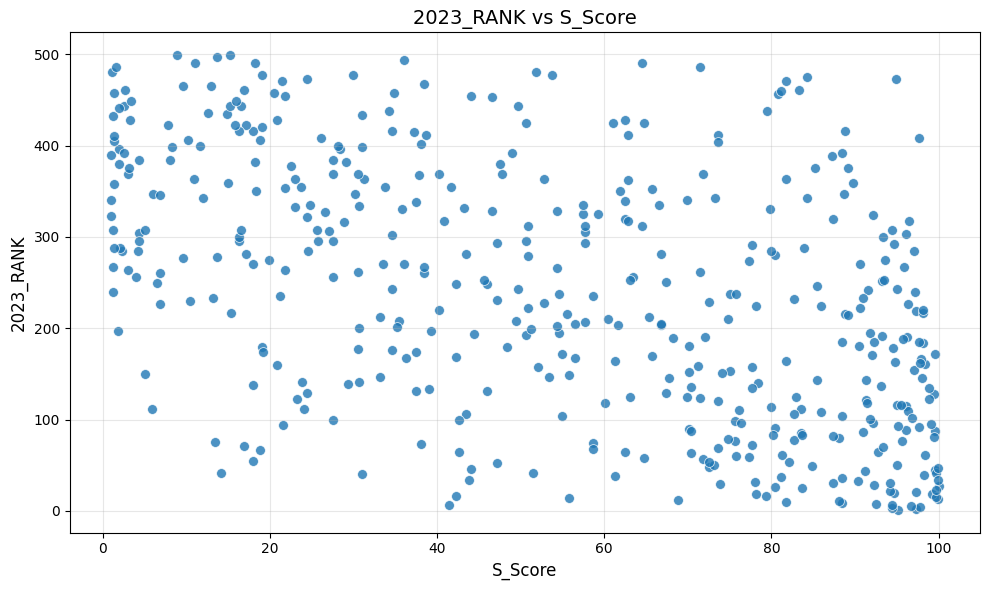

C:\Users\HARSH\AppData\Local\Temp\ipykernel_5844\3673370760.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


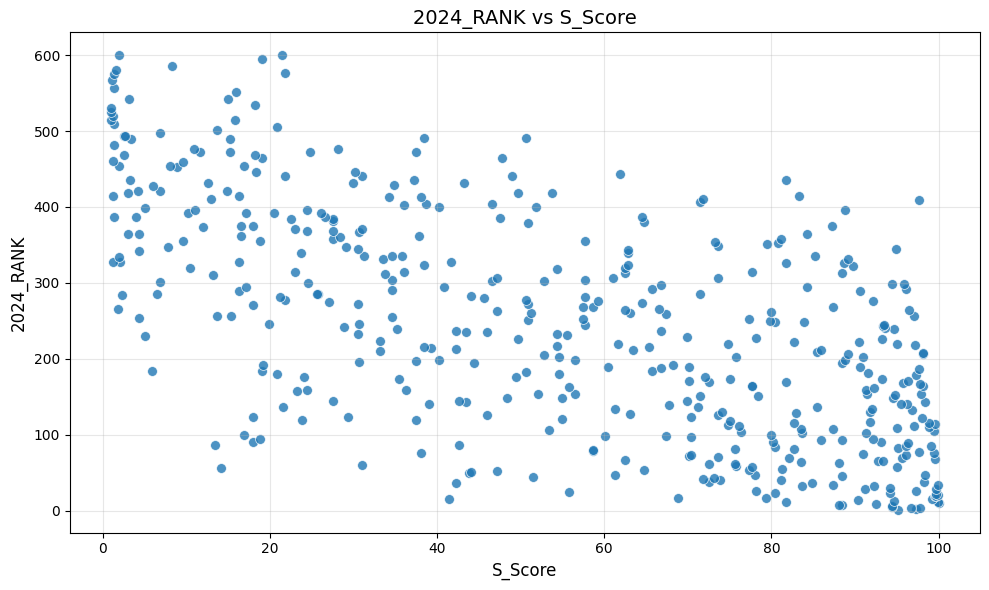

In [56]:
# Function to create a scatter plot for visualizing relationships between two variables
def plot_scatter(data, x_column, y_column, hue=None):
    # Step 1: Set up the figure size for the plot
    plt.figure(figsize=(10, 6))

    # Step 2: Use Seaborn's scatterplot to create the plot
    sns.scatterplot(
        data=data,            # DataFrame containing the data
        x=x_column,           # Column to be used for the x-axis
        y=y_column,           # Column to be used for the y-axis
        hue=hue,              # Optional column for color grouping
        palette='viridis',    # Colormap for the scatterplot
        s=50,                 # Marker size
        alpha=0.8             # Transparency of the markers
    )

    # Step 3: Add a title and labels to the plot
    plt.title(f'{y_column} vs {x_column}', fontsize=14)  # Title of the plot
    plt.xlabel(x_column, fontsize=12)  # Label for the x-axis
    plt.ylabel(y_column, fontsize=12)  # Label for the y-axis

    # Step 4: Add a legend if a hue variable is provided
    if hue:
        plt.legend(title=hue)  # Legend with the title set to the hue column

    # Step 5: Add a grid and adjust layout to prevent overlap
    plt.grid(alpha=0.3)  # Add a grid with light transparency
    plt.tight_layout()  # Automatically adjust plot elements to fit within the figure

    # Step 6: Display the plot
    plt.show()

# Example 1: Plot Sustainability Score vs Rankings for 2023
plot_scatter(
    df,                    # DataFrame containing the data
    x_column='S_Score',    # x-axis: Sustainability Score
    y_column='2023_RANK'   # y-axis: Rankings for 2023
)

# Example 2: Plot Sustainability Score vs Rankings for 2024
plot_scatter(
    df,                    # DataFrame containing the data
    x_column='S_Score',    # x-axis: Sustainability Score
    y_column='2024_RANK'   # y-axis: Rankings for 2024
)


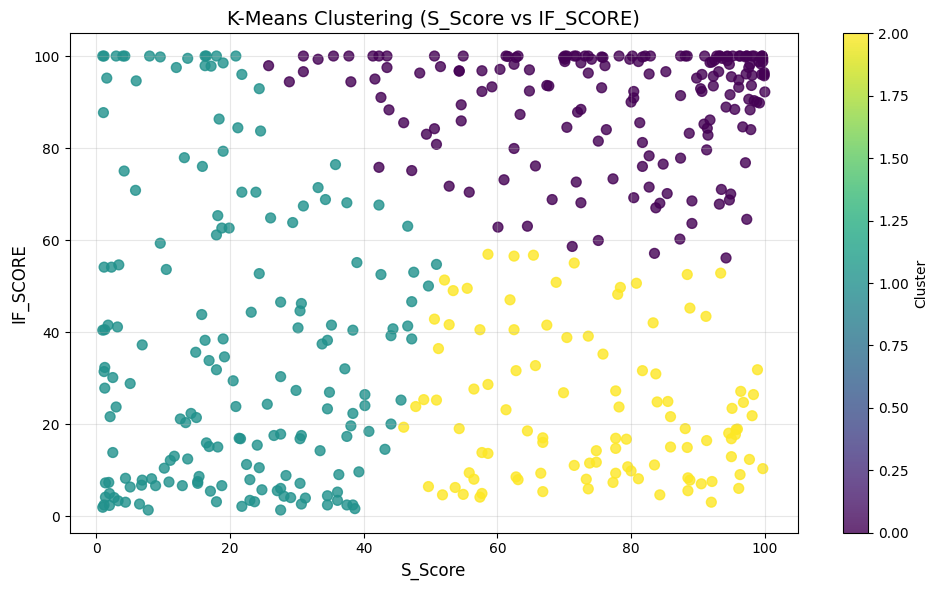

In [55]:
# Function to perform K-Means clustering on a dataset
def kmeans_clustering(data, features, n_clusters=3):
    # Step 1: Extract the selected features and handle missing values
    clustering_data = data[features].dropna()  # Remove rows with missing values for the selected features

    # Step 2: Standardize the feature data for better clustering performance
    scaler = StandardScaler()  # Create a StandardScaler instance for data normalization
    standardized_data = scaler.fit_transform(clustering_data)  # Normalize the feature values to have mean=0 and std=1

    # Step 3: Apply K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)  # Initialize K-Means with the specified number of clusters
    labels = kmeans.fit_predict(standardized_data)  # Fit the model and predict cluster labels for the data

    # Step 4: Add the cluster labels to the dataset
    clustering_data['Cluster'] = labels  # Assign cluster labels to the filtered feature data
    data.loc[clustering_data.index, 'Cluster'] = labels  # Update the original dataset with cluster labels at corresponding indices

    # Step 5: Visualize the clusters
    plt.figure(figsize=(10, 6))  # Set the figure size for the plot
    scatter = plt.scatter(
        clustering_data[features[0]],  # Use the first feature for the x-axis
        clustering_data[features[1]],  # Use the second feature for the y-axis
        c=clustering_data['Cluster'],  # Color points by cluster label
        cmap='viridis',  # Set the colormap to 'viridis'
        s=50,  # Set marker size
        alpha=0.8  # Set marker transparency
    )
    plt.colorbar(scatter, label='Cluster')  # Add a colorbar indicating cluster labels
    plt.title(f'K-Means Clustering ({features[0]} vs {features[1]})', fontsize=14)  # Set the plot title
    plt.xlabel(features[0], fontsize=12)  # Label the x-axis
    plt.ylabel(features[1], fontsize=12)  # Label the y-axis
    plt.grid(alpha=0.3)  # Add a grid to the plot with light transparency
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()  # Display the plot

    # Step 6: Return the updated dataset with cluster labels
    return data

# Step 7: Define features and number of clusters for clustering
features = ['S_Score', 'IF_SCORE']  # Features to be used for clustering
n_clusters = 3  # Number of clusters to group the data points

# Step 8: Perform clustering on the dataset
data = kmeans_clustering(df, features, n_clusters=n_clusters)
